In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to enlarge an image
def enlarge_image(image, scale_factor=1.5):
    height, width = image.shape[:2]
    new_size = (int(width * scale_factor), int(height * scale_factor))
    enlarged_image = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
    return enlarged_image

# Function to contract an image
def contract_image(image, scale_factor=0.5):
    height, width = image.shape[:2]
    new_size = (int(width * scale_factor), int(height * scale_factor))
    contracted_image = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
    return contracted_image

# Function to deform an image (e.g., perspective transformation)
def deform_image(image):
    height, width = image.shape[:2]
    src_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
    dst_points = np.float32([[0, 0], [width - 30, 20], [30, height - 20], [width, height]])
    matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    deformed_image = cv2.warpPerspective(image, matrix, (width, height))
    return deformed_image


In [3]:
image_path = 'test.png'  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

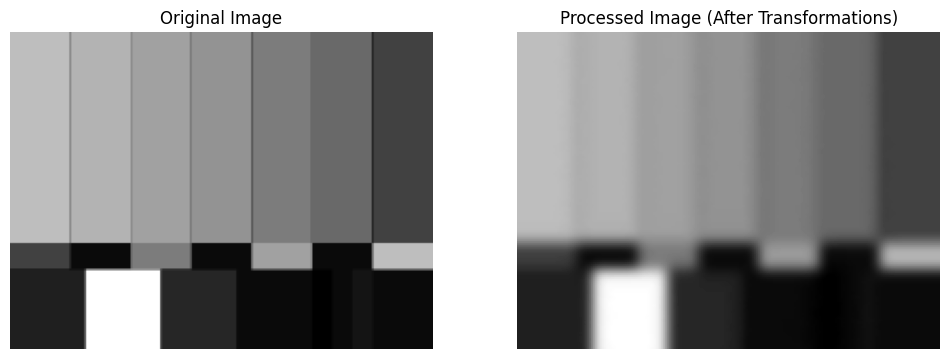

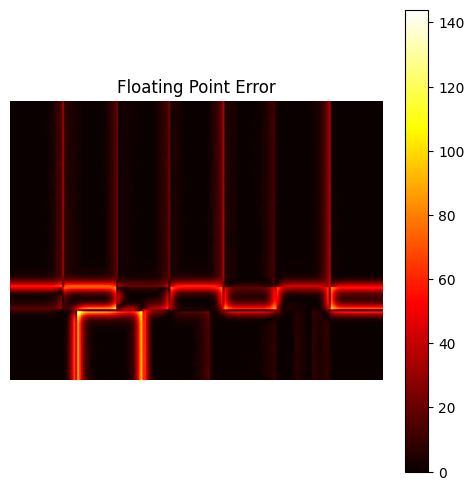

Mean Floating Point Error: 6.56790018081665


In [13]:
original_image_float = original_image.astype(np.float32)

# Apply transformations repeatedly
processed_image = original_image.copy()
for _ in range(20):  # Repeat the transformations 10 times
    processed_image = enlarge_image(processed_image, scale_factor=1.1)
    processed_image = contract_image(processed_image, scale_factor=0.9)
    #processed_image = deform_image(processed_image)

# Resize processed image to original size for comparison
processed_image_resized = cv2.resize(processed_image, original_image.shape[::-1], interpolation=cv2.INTER_LINEAR)

# Calculate the floating point error
processed_image_float = processed_image_resized.astype(np.float32)
floating_point_error = np.abs(original_image_float - processed_image_float)

# Display the original and processed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Processed Image (After Transformations)")
plt.imshow(processed_image_resized, cmap='gray')
plt.axis('off')

plt.show()

# Display the floating point error
plt.figure(figsize=(6, 6))
plt.title("Floating Point Error")
plt.imshow(floating_point_error, cmap='hot')
plt.axis('off')
plt.colorbar()
plt.show()

# Calculate and print the mean floating point error
mean_floating_point_error = np.mean(floating_point_error)
print(f"Mean Floating Point Error: {mean_floating_point_error}")